In [1]:
# Import dependencies
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Read data
red_zone_qb_proximity = pd.read_csv('https://storage.googleapis.com/big-data-bowl/redZoneQBProximity.csv')
players = pd.read_csv('https://storage.googleapis.com/big-data-bowl/players.csv')

In [3]:
players

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick
...,...,...,...,...,...,...,...
1674,53991,6-1,320,NaN,NaN,DT,Forrest Merrill
1675,53994,6-5,300,NaN,NaN,C,Ryan McCollum
1676,53999,6-4,312,NaN,NaN,DT,Jack Heflin
1677,54006,6-6,330,NaN,NaN,T,Jake Curhan


In [4]:
player_info = players[['nflId', 'displayName']].groupby(['nflId']).first().reset_index()

In [11]:
red_zone_qb_proximity_player = red_zone_qb_proximity.merge(
    player_info,
    left_on=['nflId2'],
    right_on=['nflId'],
    suffixes=('', '2_y')
)
red_zone_qb_proximity_player

,gameId,playId,frameId,nflId,officialPosition,nflId2,officialPosition2,matchupOpposing,distance,angle,nflId2_y,displayName
0,2021090900,410,1,25511.0,QB,35481.0,TE,0,6.035006,139.367813,35481,Rob Gronkowski
1,2021090900,410,2,25511.0,QB,35481.0,TE,0,5.992704,139.398705,35481,Rob Gronkowski
2,2021090900,410,3,25511.0,QB,35481.0,TE,0,6.013319,139.316028,35481,Rob Gronkowski
3,2021090900,410,4,25511.0,QB,35481.0,TE,0,6.012271,139.181638,35481,Rob Gronkowski
4,2021090900,410,5,25511.0,QB,35481.0,TE,0,6.010275,138.912721,35481,Rob Gronkowski
...,...,...,...,...,...,...,...,...,...,...,...,...
901354,2021103112,1298,36,45536.0,QB,52633.0,DE,1,2.839384,312.002211,52633,Kenny Willekes
901355,2021103112,1298,37,45536.0,QB,52633.0,DE,1,2.764489,307.947694,52633,Kenny Willekes
901356,2021103112,1298,38,45536.0,QB,52633.0,DE,1,2.731904,303.806404,52633,Kenny Willekes
901357,2021103112,1298,39,45536.0,QB,52633.0,DE,1,2.720680,298.543231,52633,Kenny Willekes


In [18]:
max_pressure = red_zone_qb_proximity_player[red_zone_qb_proximity_player['matchupOpposing'] == 1][['playId', 'nflId2', 'distance', 'displayName', 'officialPosition2']].groupby(['playId', 'nflId2']).min().reset_index()

In [28]:
max_pressure[max_pressure['distance'] < 1]

,playId,nflId2,distance,displayName,officialPosition2
22,95,35562.0,0.910659,Al Woods,DT
105,162,44915.0,0.470956,Trey Hendrickson,DE
107,162,46146.0,0.865852,Sam Hubbard,DE
161,189,47795.0,0.415933,Rashan Gary,OLB
207,210,43694.0,0.790063,Michael Pierce,NT
...,...,...,...,...,...
11029,4586,46958.0,0.274591,Chris Board,MLB
11033,4604,38556.0,0.715891,Whitney Mercilus,DE
11054,4608,53460.0,0.516140,Odafe Oweh,OLB
11101,4670,42535.0,0.562939,Darius Philon,DT


In [42]:
def generate_plot(nflId, display_name, official_position):
    fig0, ax0 = plt.subplots()
    ax1 = ax0.twinx()
    
    max_pressure[max_pressure['nflId2'] == nflId]['distance'].plot.density(ax=ax0, figsize=(10,4),
                              xlim=(5,0),
#                                                                            grid=False, bins=50
                                                                          )
    max_pressure[max_pressure['nflId2'] == nflId]['distance'].plot.hist(ax=ax1, figsize=(10,4),
                              xlim=(5,0),
                                                                           grid=False, bins=50
                                                                          )
    
    plt.xlabel('Distance from QB')
    plt.ylabel('Frequency')
    plt.title(f'Max Pressure by Play - {display_name} ({official_position})')

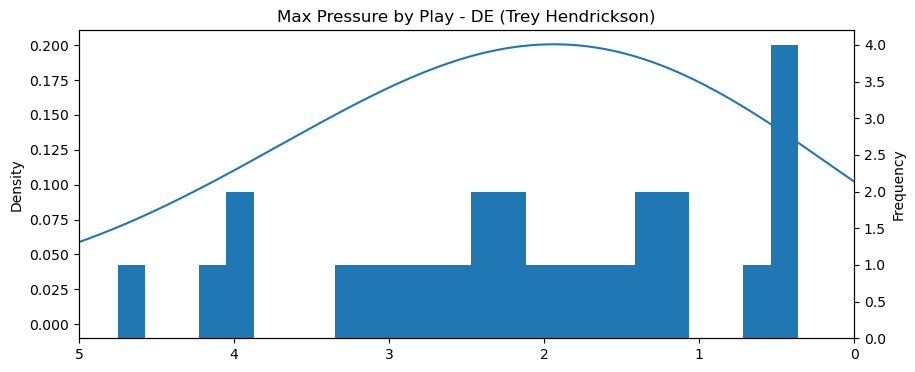

In [43]:
generate_plot(44915.0, 'DE', 'Trey Hendrickson')

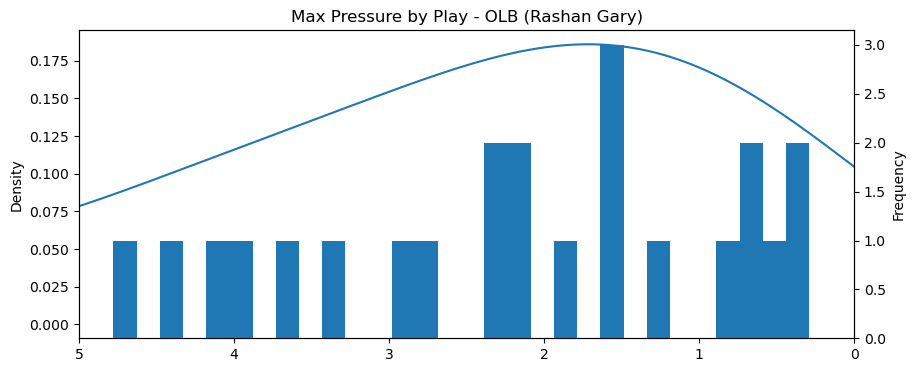

In [45]:
generate_plot(47795, 'OLB', 'Rashan Gary')